In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol

In [2]:
%%html
<style>
table {float:left}
</style>

In [3]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Δεδομένα

| Σύμβολο       | Περιγραφή     |
| :------------:|:--------------|
| $h$           | ύψος φατνώματος  |
| $l$           | μήκος φατνώματος  |
| $f_{wc}$      | θλιπτική αντοχή τοιχοποιίας  |
| $t$           | πάχος τοιχοποιίας  |
| $ρ$           | ποσοστό διαμήκους οπλισμού στύλων  |
| $N$           | θλιπτικό αξονικό φορτίο στύλων για κατακόρυφα φορτία  |
| $A_c$         | εμβαδό διατομής στύλου  |   

- Παρατήρηση:
Στο παράδειγμα θεωρείται Ν=0kN για μη επαρκώς σφηνωμένη τοιχοποιία στο περιβάλλον πλαίσιο.

In [4]:
# Διαστάσεις φατνώματος
h = 3.0         # m
l = 6.0         # m

# Χαρακτηριστικά τοιχοποιίας
fwc = 1.5       # MPa
t = 0.2         # m

# Στοιχεία υποστυλωμάτων
ρ = 1           # %
N = 0.0         # kΝ
Ac = 0.25       # m2

# Υπολογισμός

## Διάγραμμα τ-γ

### 1ος κλάδος

Δυσκαμψία: $k_w = 1.71\cdot f_{wc} \cdot (80+\dfrac{h}{t})$

Παραμόρφωση στη ρηγμάτωση του τοίχου: $γ_{cr} = \dfrac{0.09}{\sqrt{f_{wc}}\cdot(80+\dfrac{h}{t})}$

Τάση ρηγμάτωσης: $τ_{cr} = k_w \cdot γ_{cr}$

### 2ος κλάδος

Παραμόρφωση στο σημείο έναρξης της θραύσης: $γ_{u} = 4.545 \cdot γ_{cr}$

Τάση στο σημείο έναρξης της θραύσης: $τ_{u} = 0.22 \cdot \sqrt{f_{wc}}$

### 3ος κλάδος

Θλιπτική τάση στο υποστύλωμα: $σ = \dfrac{N}{A_c}$

$\dfrac{τ}{τ_{u}}=1 + 0.24 \cdot \sqrt{\dfrac{\dfrac{γ}{γ_{u}} - 1}{ρ^{3.82\cdot(1-0.22\cdot σ)}\cdot (1 + 0.166\cdot σ)}} $

### Τέλος καμπύλης

Θεώρηση ως τελικού σημείου στο γ=0.02

In [5]:
kw = 1.71 * fwc * (80 + h / t)
γcr = 0.09 / (fwc**0.5 * (80 + h / t))
τcr = kw * γcr

τu = 0.22 * fwc**0.5
γu = 4.545 * γcr

σ = N * 0.001 / Ac

print('1oς κλάδος')
print(f'kw = {kw:.2f}MPa')
print(f'γcr = {γcr:.6f}')
print(f'τcr = {τcr:.4f}MPa')
print('')

print('2oς κλάδος')
print(f'γu = {γu:.6f}')
print(f'τu = {τu:.4f}MPa')

def τ3(γ: float, τu: float, γu: float, ρ: float, σ: float):
    x1 = (γ / γu) -1
    x2 = np.power(ρ, (3.82 * (1 - 0.22 * σ)))
    x3 = 1.0 + 0.166 * σ
    return τu * (1 - 0.24 * np.sqrt( x1 / (x2 * x3)))

τ002 = τ3(0.02, τu, γu, ρ, σ)

print('')
print('Τέλος καμπύλης για γ=0.02')
print(f'τ0.02 = {τ002:.4f}')

1oς κλάδος
kw = 243.67MPa
γcr = 0.000774
τcr = 0.1885MPa

2oς κλάδος
γu = 0.003516
τu = 0.2694MPa

Τέλος καμπύλης για γ=0.02
τ0.02 = 0.1294


### Σχεδίαση διαγράμματος τ-γ

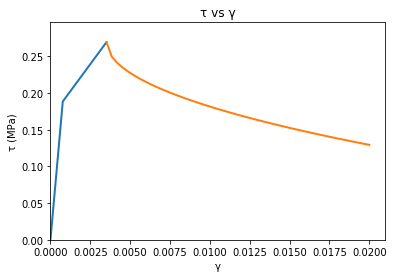

In [6]:
x1 = [0, γcr, γu]
y1 = [0, τcr, τu]

x2 = np.linspace(γu, 0.02, 50)
y2 = τ3(x2, τu, γu, ρ, σ)

plt.plot(x1, y1, lw=2)
plt.plot(x2, y2, lw=2)

#plt.axis([0, 1.2 * 100 * γu, 0, 1.2 * τu])
plt.axis([0, 0.021, 0, 1.1 * τu])
plt.ylabel('τ (MPa)')
plt.xlabel('γ')
plt.title('τ vs γ')

plt.show()

### 4-γραμμική προσέγγιση διαγράμματος τ-γ

Ο 3ος πτωτικός κλάδος του διαγράμματος μετατρέπεται σε δύο ευθείες γραμμές με τις εξής παραδοχές:

- Ίσο εμβαδό μεταξύ των δύο προσεγγίσεων
- Ο τελευταίος κλάδος είναι οριζόντιος με τ=τ(0.02)


Εμβαδό κάτω από το διάγραμμα του 3ου κλάδου
Area = 0.002904
γD = 0.014525


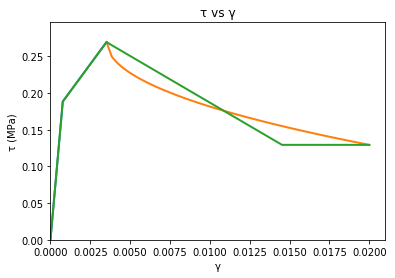

In [7]:
Area = np.trapz(y2, x2)
print('')
print('Εμβαδό κάτω από το διάγραμμα του 3ου κλάδου')
print('Area = {0:.6f}'.format(Area))

γtmp = Symbol('γtmp')
γD = solve((τ002 * (0.02 - γtmp) + 0.5 * (γtmp - γu) * (τ002 + τu) - Area), γtmp)[0]
print('γD = {0:.6f}'.format(γD))

xlin = [0, γcr, γu, γD, 0.02]
ylin = [0, τcr, τu, τ002, τ002]

plt.plot(x1, y1, lw=2)
plt.plot(x2, y2, lw=2)
plt.plot(xlin, ylin, lw=2)
#plt.axis([0, 1.2 * 100 * γu, 0, 1.2 * τu])
plt.axis([0, 0.021, 0, 1.1 * τu])
plt.ylabel('τ (MPa)')
plt.xlabel('γ')
plt.title('τ vs γ')

# plt.savefig( 'myfig.png' )
plt.show()

## Ισοδύναμη διαγώνιος

Θεωρείται ότι η τοιχοποιία πλήρωσης έχει διατοµή $A_w$ και µέτρο διάτµησης $G_w$, ενώ η ισοδύναµη διαγώνιος έχει διατοµή $Α_s$ και µέτρο ελαστικότητας $E_s$. Η προσοµοίωση ενός τοιχοπληρωµένου πλαισίου µε στοιχείο ισοδύναµης διαγωνίου γίνεται έτσι ώστε τα δύο πλαίσια να έχουν την ίδια δυσκαµψία.

Τα δύο τοιχοπληρωµένα πλαίσια δέχονται οριζόντια δύναµη $V$ και µετατοπίζονται κατά ποσότητα $δ$. Η δύναµη $V$ δηµιουργεί δύναµη $S$ στη θλιβόµενη διαγώνιο της οποίας το µήκος µειώνεται κατά $∆d$. 

$∆d = δ \cdot cosα$

Η ανηγμάνη παραμόρφωση είναι: $ε = \dfrac{∆d}{d} = \dfrac{δ \cdot cosα}{d}$ 

Αλλά και $ε = \dfrac{σ}{E_s}=\dfrac{S}{A_s\cdot E_s}$ 

Από τις δύο παραπάνω σχέσεις προκύπτει: $S=\dfrac{A_s\cdot E_s \cdot δ \cdot cosα}{d}$

Η ίδια δύναµη S, δρώσα επί του τοιχοπληρωµένου πλαισίου παράγει οριζόντια συνιστώσα Η. Οπότε:

$H = S \cdot cosα$

Η διατμητική παραμόρφωση είναι  $γ = \dfrac{γ}{h}$

Αλλά και $γ = \dfrac{τ}{G_w} = \dfrac{H}{A_w\cdot G_w}$

Από τις παραπάνω σχέσεις προκύπτει: $H = A_w\cdot G_w \cdot \dfrac{δ}{h}$ 

οπότε: $S=\dfrac{H}{cosα} = \dfrac{A_w\cdot G_w\cdot δ}{h\cdot cosα}= \dfrac{A_w\cdot G_w\cdot δ}{d\cdot sinα \cdot cosα}$

Συνδυάζοντας τις παραπάνω σχέσεις του S προκύπτει:

$A_s\cdot E_s = \dfrac{A_w\cdot G_w}{sinα \cdot cos^2α}$

Προκύπτει λοιπόν ότι όταν διατίθεται ένα διάγραµµα $τ – γ$ τοιχοποιίας εµβαδού $Α_w$ και δεδοµένης γεωµετρίας (γωνία $α$), τότε είναι δυνατό να προκύψει το αντίστοιχο διάγραµµα $S – ε$, δύναµης – ανηγµένης παραµόρφωσης διαγωνίου, µε δυστένεια $A_s\cdot E_s$ υπολογιζόµενη από την παραπάνω σχέση.

Από τη γεωμετρία του φατνώματος $α=tan^{-1}(h/l)$

### "Δυσκαμψίες" - κλίσεις κλάδων

|Τμήμα|$K_w$                                  |$A_s\cdot E_s$  |
|:---:|:-------------------------------------:|:--------------:|
|AB   |$K_w=\dfrac{τ_{cr}}{γ_{cr}}$           |$A_s\cdot E_s=1000\cdot\dfrac{A_w\cdot K_w}{sinα\cdot cos^2a}$ |
|BC   |$K_w'=\dfrac{τ_u-τ_{cr}}{γ_u-γ_{cr}}$  |$A_s\cdot E_s'=1000\cdot\dfrac{A_w\cdot K_w'}{sinα\cdot cos^2a}$ |
|CD   |$K_w''=\dfrac{τ_D-τ_u}{γ_D-γ_u}$  |$A_s\cdot E_s''=1000\cdot\dfrac{A_w\cdot K_w''}{sinα\cdot cos^2a}$ |
|+++++|++++++++++++++++++++++++++++++|+++++++++++++++++++++++++++++++++++++++++++++++++++|

### Σημεία διαγράμματος F - δ

|Σημείο| τ      | γ      |d                                   |δ                      |F                                   |
|:----:|:-------|:------:|:----------------------------------:|:---------------------:|:----------------------------------:|
|Α     |0       |0       |$d_A=\sqrt{h^2+l^2}$                |0                      |0                                   |
|B     |$τ_{cr}$|$γ_{cr}$|$d_B=\sqrt{h^2+(l-h\cdot γ_{cr})^2}$|$δ_B=δ_{cr}=-(d_B-d_A)$|$F_B=F_{cr}=\dfrac{E_{s}A_s}{d}δ_{cr}$|
|C     |$τ_{u}$ |$γ_{u}$ |$d_C=\sqrt{h^2+(l-h\cdot γ_{u})^2}$ |$δ_C=δ_{u}=-(d_C-d_A)$ |$F_C=F_{u}=\dfrac{E_{s}'A_s}{d}(δ_u-δ_{cr})$|
|D     |$τ_D$   |$γ_D$   |$d_D=\sqrt{h^2+(l-h\cdot γ_{D})^2}$ |$δ_D=-(d_D-d_A)$       |$F_D=\dfrac{E_{s}''A_s}{d}(δ_D-δ_u)$|
|E     |$τ_E$   |$γ_E$   |$d_E=\sqrt{h^2+(l-h\cdot γ_{E})^2}$ |$δ_E=-(d_E-d_A)$       |$F_E=F_D$  |
|++++++|++++++++|++++++++|++++++++++++++++++++++++++++++++++++|+++++++++++++++++++++++|++++++++++++++++++++++++++++++++++++|

kw_BC = 29.52
kw_CD = -12.72
EsAs_AB = 817310.80
EsAs_BC = 99022.49
EsAs_CD = -42662.02
dA = 6.7082
dB = 6.7061
dC = 6.6988
dD = 6.6693
dE = 6.6546
δA = 0.0000
δB = 0.0021
δC = 0.0094
δD = 0.0389
δE = 0.0536
FA = 0.00
FB = 252.87
FC = 361.46
FD = 173.77
FE = 173.77


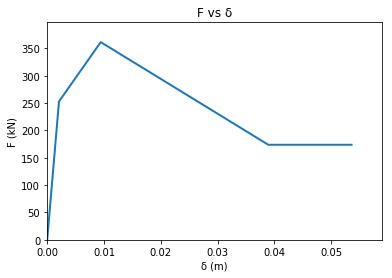

In [8]:
kw_BC = (τu - τcr) / (γu - γcr)
kw_CD = (τ002 - τu) / (γD - γu)

print('kw_BC = {0:.2f}'.format(kw_BC))
print('kw_CD = {0:.2f}'.format(kw_CD))

Aw = l * t
α = np.arctan(h/l)  # Η γωνία με την οριζόντιο

EsAs_AB = 1000 * Aw * kw / (math.sin(α) * math.cos(α) * math.cos(α))
EsAs_BC = 1000 * Aw * kw_BC / (math.sin(α) * math.cos(α) * math.cos(α))
EsAs_CD = 1000 * Aw * kw_CD / (math.sin(α) * math.cos(α) * math.cos(α))

print('EsAs_AB = {0:.2f}'.format(EsAs_AB))
print('EsAs_BC = {0:.2f}'.format(EsAs_BC))
print('EsAs_CD = {0:.2f}'.format(EsAs_CD))

d = (h**2 + l**2)**0.5
dA = d
dB = math.sqrt(math.pow(h,2) + math.pow(l - h * γcr, 2))
dC = math.sqrt(math.pow(h,2) + math.pow(l - h * γu, 2))
dD = math.sqrt(math.pow(h,2) + math.pow(l - h * γD, 2))
dE = math.sqrt(math.pow(h,2) + math.pow(l - h * 0.02, 2))

print('dA = {0:.4f}'.format(dA))
print('dB = {0:.4f}'.format(dB))
print('dC = {0:.4f}'.format(dC))
print('dD = {0:.4f}'.format(dD))
print('dE = {0:.4f}'.format(dE))

δA = 0.0
δB = - (dB - dA)
δC = - (dC - dA)
δD = - (dD - dA)
δE = - (dE - dA)

print('δA = {0:.4f}'.format(δA))
print('δB = {0:.4f}'.format(δB))
print('δC = {0:.4f}'.format(δC))
print('δD = {0:.4f}'.format(δD))
print('δE = {0:.4f}'.format(δE))

FA = 0
FB = EsAs_AB * δB / d
FC = EsAs_BC * (δC - δB) / d + FB
FD = EsAs_CD * (δD - δC) / d + FC
FE = FD

print('FA = {0:.2f}'.format(FA))
print('FB = {0:.2f}'.format(FB))
print('FC = {0:.2f}'.format(FC))
print('FD = {0:.2f}'.format(FD))
print('FE = {0:.2f}'.format(FE))

XFδ = [δA, δB, δC, δD, δE]
YFδ = [FA, FB, FC, FD, FE]

plt.plot(XFδ, YFδ, lw=2)
plt.axis([0, 1.1 * δE, 0, 1.1 * FC])
plt.ylabel('F (kN)')
plt.xlabel('δ (m)')
plt.title('F vs δ')

plt.show()